In [1]:
import numpy as np
from datetime import datetime
import _pickle as pickle

In [2]:
startTime = datetime.now()

input_diag_seq = pickle.load(open("../../data/advance/input_diag_seq","rb"))
input_proc_seq = pickle.load(open("../../data/advance/input_proc_seq","rb"))
input_drug_seq = pickle.load(open("../../data/advance/input_drug_seq","rb"))

print(datetime.now() - startTime)

0:00:03.991269


In [3]:
from gensim.models import Word2Vec

In [4]:
sentence = []
for p_diag, p_proc, p_drug in zip(input_diag_seq, input_proc_seq, input_drug_seq):
    for v_diag, v_proc, v_drug in zip(p_diag, p_proc, p_drug):
        codes = list(v_diag) + list(v_proc) + list(v_drug)
        if not codes:continue
        sentence.append(codes)

In [5]:
embed_size = 64
model = Word2Vec(sentence, size=embed_size, window=100, min_count=0, workers=4)

# visualization

In [6]:
Embed_Matrix = np.zeros((len(model.wv.vocab), embed_size))
idx=0
for code in model.wv.vocab:
    Embed_Matrix[idx] = model.wv[code]
    idx+=1
Embed_Matrix.shape

(10917, 64)

In [7]:
from sklearn import metrics
import random
from collections import Counter

In [8]:
icd_embedding = []
label = []
idx=0
for code in model.wv.vocab:
    new_code = code.replace(".","")
    if new_code in icd2ccs:
        icd_embedding.append(model.wv[code])
        label.append(icd2ccs[new_code])
icd_embedding = np.array(icd_embedding)

NameError: name 'icd2ccs' is not defined

In [ ]:
shuffle_label = label.copy()
random.shuffle(shuffle_label)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score

kmeans = KMeans(n_clusters=251, random_state=0).fit(icd_embedding)
kmeans_label = kmeans.labels_

In [ ]:
normalized_mutual_info_score(label, kmeans_label, average_method='arithmetic')

In [ ]:
normalized_mutual_info_score(label, shuffle_label, average_method='arithmetic')

In [278]:
metrics.calinski_harabasz_score(icd_embedding, label)

4.491548372211455

In [279]:
metrics.silhouette_score(icd_embedding, shuffle_label)

-0.62588584

In [280]:
metrics.davies_bouldin_score(icd_embedding, label)

4.093673257127156

In [281]:
metrics.davies_bouldin_score(icd_embedding, shuffle_label)

5.91261584627053

In [18]:
model.wv.most_similar("311")

[('300.9', 0.7829837203025818),
 ('V62.84', 0.7826189994812012),
 ('296.20', 0.7571191787719727),
 ('296.23', 0.710718035697937),
 ('296.34', 0.6748372316360474),
 ('296.30', 0.6641460061073303),
 ('300.00', 0.6624369621276855),
 ('124', 0.6599712371826172),
 ('296.33', 0.6557086706161499),
 ('298.9', 0.638091504573822)]

In [133]:
#cpt2ccs = pickle.load(open("/Users/xxz005/Desktop/RAW_DATA/cpt2ccs", "rb"))
cpt2ccs = pickle.load(open("/Users/xxz005/Desktop/RAW_DATA/icd2ccs", "rb"))

In [134]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [145]:
labels = []
tokens = []

for word in model.wv.vocab:
    new_word = word.replace(".","")
    if new_word in cpt2ccs:
        tokens.append(model.wv[word])
        labels.append(cpt2ccs[new_word])

In [146]:
tsne_model = TSNE(n_components=2, init='pca', random_state=23)
new_values = tsne_model.fit_transform(tokens)

In [147]:
x = []
y = []
for value in new_values:
    x.append(value[0])
    y.append(value[1])

In [148]:
from matplotlib.pyplot import cm
color = cm.rainbow(np.linspace(0,1,5))

In [149]:
Counter(labels).most_common(k)

[('239', 81),
 ('91', 66),
 ('217', 59),
 ('229', 58),
 ('259', 58),
 ('211', 54),
 ('235', 52),
 ('240', 51),
 ('94', 45),
 ('232', 42)]

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:15: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  from ipykernel import kernelapp as app


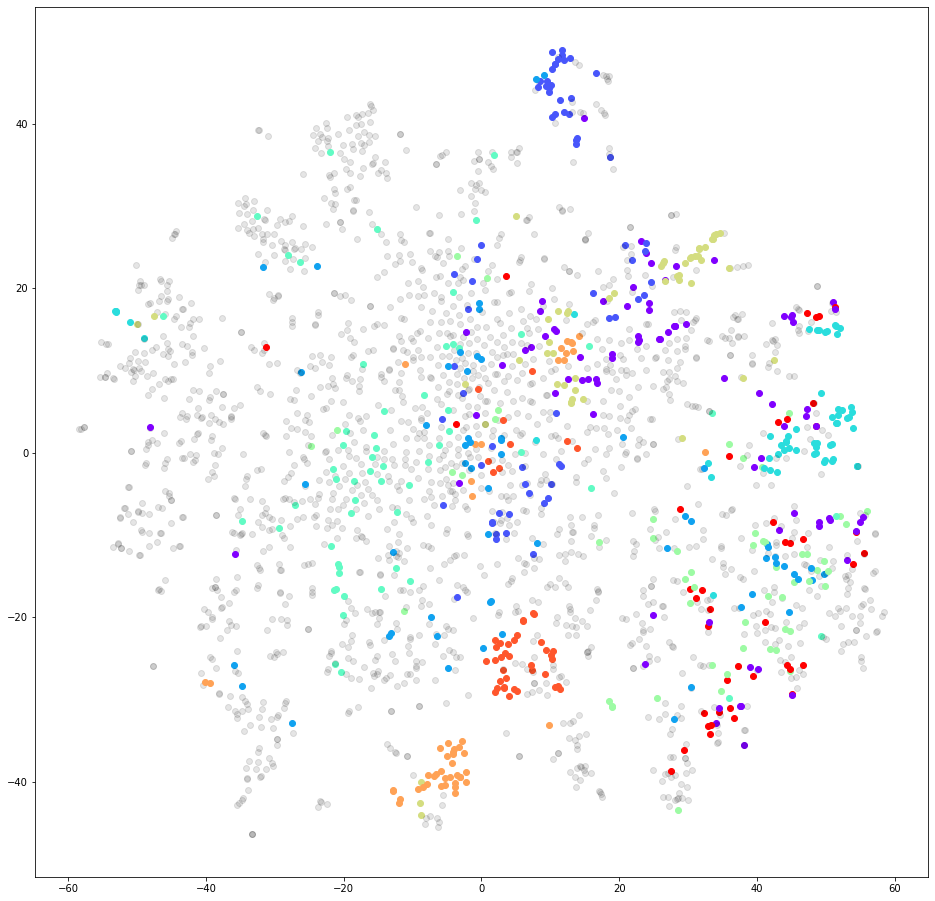

In [150]:
k=10
my_colors = {}
label = {}
color=cm.rainbow(np.linspace(0,1,k))

for idx, ele in enumerate(Counter(labels).most_common(k)):
    ele = ele[0]
    my_colors[ele] = color[idx]
    label[ele] = "ccs_"+ ele
    
plt.figure(figsize=(16, 16)) 
for i in range(len(x)):
    c = my_colors.get(labels[i], 'black')
    if c=="black": alpha=0.1
    else:alpha = 1
    plt.scatter(x[i],y[i], color = c, alpha=alpha)
plt.show()